# Introdução ao SQL

## Recapitulando

Comandos apresentados na aula passada.

## Objetivos

Ao final desta aula o aluno deverá conhecer:

1. As principais funções para criação de banco de dados;
1. Saber como manipular registros em bancos de dados;
1. Entender como criar um banco de dados local;

# Criando um banco de dados e manipulando dados persistidos

Já sabemos como consultar informações em bancos de dados. Hoje vamos explorar como um banco de dados é criado e como inserir, atualizar e deletar dados.

CRUD é um acrônimo para:
- C: Create
- R: Read
- U: Update
- D: Delete

Em geral, as empresas possuem times totalmente dedicados à criação e manutenção de bancos de dados, que restringem a maioria (se não todos) dos comandos que aprenderemos hoje aos demais usuários.

Tais restrições são necessárias para que seja garantida a integridade e bom funcionamento do banco.

# DDL - Data Definition Language

**Exercício:**

Vamos criar juntos uma base de dados para o banco com duas tabelas `agencias` e `clientes`. Essas tabelas devem estar relacionadas.

Considere que um cliente pode ter conta em várias agências e uma agência deve ter muitos clientes.

A tabela `agências` deve conter código, nome, endereço e telefone da agência.  
A tabela `clientes` deve conter um código do cliente, nome, data de nascimento, agência e conta.


## CREATE
Usado para criar um banco de dados, tabela e outros objetos em um banco de dados. Um guia sobre os tipos de campos pode ser encontrado [aqui](https://aprendendodotnet.wordpress.com/2012/03/10/sql-server-o-comando-create-table-e-tipos-de-dados/#:~:text=SQL%20Server%20%E2%80%93%20O%20Comando%20CREATE%20TABLE%20e,Comprimento%20Fi%20...%20%208%20more%20rows%20).

Criar a tabela `agencias`. Quais as condições em cada campo?

Query:

    CREATE TABLE agencias(
        agencia_id SERIAL PRIMARY KEY, 
        nome varchar(255) NOT NULL, -- restricao de campo não nulo
        endreco varchar(255), 
        telefone varchar(255)	
    );

Criar a tabela `clientes`. Quais as condições em cada campo?

**OBS:** Como utitlizar a chave estrangeira?

Query:

    CREATE TABLE cliebtes(
        cliente_id SERIAL PRIMARY KEY, 
        nome VARCHAR(255), 
        data_de_nascimento DATE, 
        agencia INT REFERENCES agencias(agencia_id), 
        conta INT NOT NULL
    );

## CREATE TABLE COM SELECT

Podemos criar uma tabela a partir de um comando SELECT.

    CREATE TABLE employees2
    AS 
    SELECT e.last_name, e.first_name
    FROM employees AS e;

## ALTER
Usado para alterar a estrutura de tabelas ou outro objeto em um banco de dados.

Exemplo: Altere o nome da tabela cliebtes para clientes.

Query:

    ALTER TABLE cliebtes RENAME TO clientes;

Altere o tipo da coluna nome na table clientes para TEXT.

Query:

    ALTER TABLE clientes
    ALTER COLUMN nome TYPE TEXT;

Arrume o nome da coluna endereço na tabela `agencias`.

Query:

    ALTER TABLE agencias
    RENAME COLUMN endreco to endereco;

Adicione a coluna bom pagador à tabela `cliente`.

Query:

    ALTER TABLE clientes
    ADD COLUMN pagador BOOLEAN;

## DROP
Usado para apagar bancos de dados, tabelas e outros objetos.

Delete a tabela `customers`.

Query:

    DROP TABLE agencias;
    DROP TABLE IF EXISTS agencias;  -- DROP TABLE [IF EXISTS] table_name; --> Entre colchetes: opcional!

# DML - Data Manipulation Language

## INSERT
Usado para inserir um registro numa tabela existente.

Insira os dados de uma agência na tabela.

Query:

    INSERT INTO agencias(nome, endereco, telefone)
    VALUES ('Matriz', 'Rua da espernaça, 76', 11-99898-7417);

Resultado:

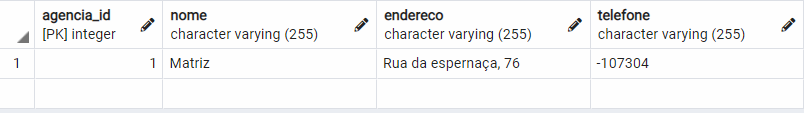

Adicione um registo sem um dos campos, por exemplo, endereço.

Query:

    INSERT INTO agencias(nome, telefone)
    values ('LC', '12-99887-6655');

Resultado:

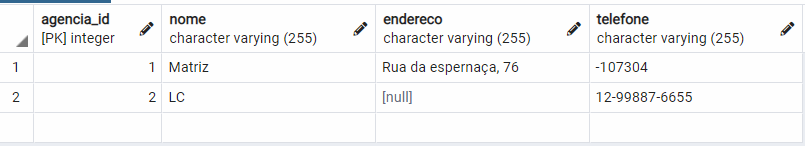

Adicione um registro sem o campo nome. O que aconteceu?

Query:

    INSERT INTO agencias(endereco, telefone)
    VALUES ('Rua do não sei, 171', '13-11122-3344');

Resultado:

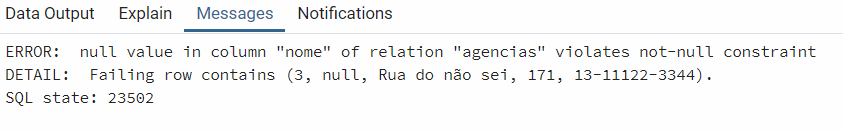

## INSERT COM SELECT

Podemos inserir dados em uma tabela a partir de um SELECT.

    INSERT INTO employee2 (last_name, first_name)
    SELECT last_name, first_name FROM employees;

Cuidado com as colunas retornadas pelo SELECT, pois precisam ser compatíveis com as colunas da tabela.

## UPDATE
Usado para alterar valores de dados em um ou mais registros de uma tabela.

Arrume o campo telefone da agência matriz.

Query:

    UPDATE agencias
    SET telefone = '11-99898-7417'
    WHERE agencia_id = 1;

Resultado:

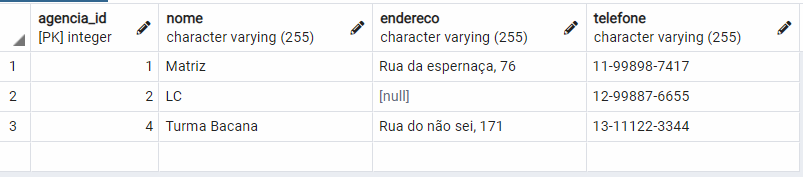

Cuidado com a falta do WHERE!

Query:

    UPDATE agencias
    SET endereco = 'Av. Não esqueça o WHERE';

Resultado:

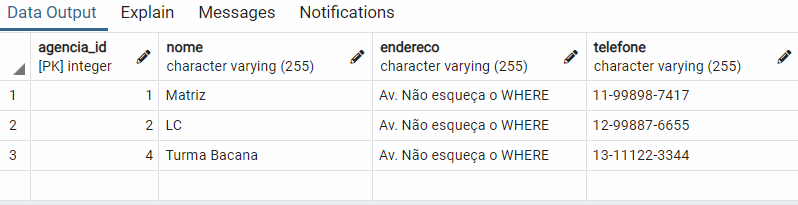

## DELETE
Usado para remover registros de uma tabela.

Delete o registro de nome = 'LC'?

Query:

    DELETE FROM agencias
    where nome = 'LC';

Resultado:

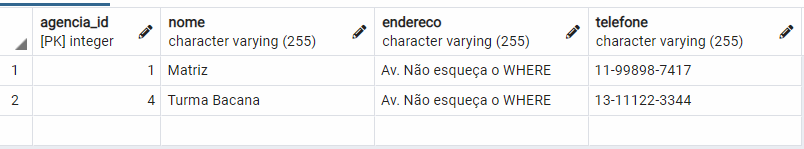


# INDICES

Exemplo encontrado [aqui](https://pt.wikibooks.org/wiki/PostgreSQL_Pr%C3%A1tico/DDL/%C3%8Dndices,_Tipos_de_Dados_e_Integridade_Referencial).

Uma tabela contendo os CEPs do Brasil, com 633.401 registros.

- sem indice

    SELECT * FROM cep_tabela WHERE cep = ‘60420440’;

    **Em 7691 ms**
   

- Pós adicionar um índice:

    ALTER TABLE cep_tabela ADD CONSTRAINT cep_pk PRIMARY KEY (cep);


    A mesma consulta anterior agora gasta apenas **10 ms**.



Como criar um indice?

    CREATE INDEX nomeindice ON tabela (lower (nomecampo));

Crie um indice na tabela `agencia`.

Query:

    CREATE INDEX agidindex ON agencias(agencia_id);

Resultado:

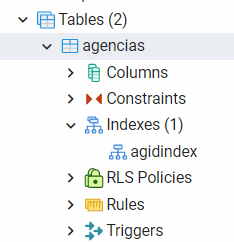

# Exercícios

Executar as consultas abaixo em SQL e enviar o arquivo sql para o e-mail do professor da seguinte forma:

E-mail: williamtx1987@gmail.com

Assunto: 767_firstname_lastname_aula05

Escrever um comentário antes de cada comando indicando a qual exercício ele se refere.

### Q1

Crie duas tabelas: produto e categoria. Essas duas tabelas devem estar relacionadas.

- Considere que o produto possui uma descrição, preço, frete e categoria. 
- Considere que a categoria possui apenas uma descrição. 
- Não esqueça de inserir as chaves primárias e estrangeira da forma correta, de modo a criar o relacionamento entre as tabelas.

### Q2

Adicione 3 registros em cada tabela.

### Q3

Crie duas tabelas: turmas e alunos. Essas duas tabelas devem estar relacionadas. 

- Um aluno pode pertencer a muitas turmas e uma turma deve conter muitos alunos (tabela extra).
- Considere que o aluno possui: nome, matrícula, data de nascimento e e-mail. 
- A turma possui os atributos descrição, professor (considere apenas um), data de início, e data de término.

### Q4

Adicione 3 registros em cada tabela.